In [1]:
import torch

* 使用PyTorch实现一个学习系统
* 理解最基础的nerual networks / deep learning知识

AI > Machine Learning > 表示学习（学习数据集的特征）> Deep learning

神经网络历史：
* 1998 LeNet-5
* 2012 AlexNet
* 2014 GoogLeNet & VGG
* 2015 ResNet

w= 0.0
MSE= 18.666666666666668
w= 0.1
MSE= 16.846666666666668
w= 0.2
MSE= 15.120000000000003
w= 0.30000000000000004
MSE= 13.486666666666665
w= 0.4
MSE= 11.946666666666667
w= 0.5
MSE= 10.5
w= 0.6000000000000001
MSE= 9.146666666666663
w= 0.7000000000000001
MSE= 7.886666666666666
w= 0.8
MSE= 6.719999999999999
w= 0.9
MSE= 5.646666666666666
w= 1.0
MSE= 4.666666666666667
w= 1.1
MSE= 3.779999999999999
w= 1.2000000000000002
MSE= 2.986666666666665
w= 1.3
MSE= 2.2866666666666657
w= 1.4000000000000001
MSE= 1.6799999999999995
w= 1.5
MSE= 1.1666666666666667
w= 1.6
MSE= 0.746666666666666
w= 1.7000000000000002
MSE= 0.4199999999999995
w= 1.8
MSE= 0.1866666666666665
w= 1.9000000000000001
MSE= 0.046666666666666586
w= 2.0
MSE= 0.0
w= 2.1
MSE= 0.046666666666666835
w= 2.2
MSE= 0.18666666666666698
w= 2.3000000000000003
MSE= 0.42000000000000054
w= 2.4000000000000004
MSE= 0.7466666666666679
w= 2.5
MSE= 1.1666666666666667
w= 2.6
MSE= 1.6800000000000008
w= 2.7
MSE= 2.2866666666666693
w= 2.8000000000000003
MSE= 

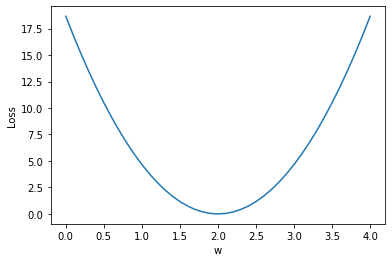

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1,2,3]
y_data = [2,4,6]

def forward(x,w):
    return x* w

def loss(x,y,w):
    y_pred = forward(x,w)
    return (y_pred-y)**2

w_list = []
mse_list = []
for w in np.arange(0,4.1,0.1):
    print("w=",w)
    l_sum = 0
    for x_val,y_val in zip(x_data,y_data):
        loss_val = loss(x_val,y_val,w)
        l_sum += loss_val
    print("MSE=",l_sum/len(x_data))
    w_list.append(w)
    mse_list.append(l_sum/len(x_data))
plt.plot(w_list,mse_list)
plt.ylabel("Loss")
plt.xlabel("w")
plt.show()

PyTorch可视化工具visdom


3维图：np.meshgrid()

Predict(before training) 4 4
epoch:  0 w: 1.0933333333333333 loss:  4.666666666666667
epoch:  1 w: 1.1779555555555554 loss:  3.8362074074074086
epoch:  2 w: 1.2546797037037036 loss:  3.1535329869958857
epoch:  3 w: 1.3242429313580246 loss:  2.592344272332262
epoch:  4 w: 1.3873135910979424 loss:  2.1310222071581117
epoch:  5 w: 1.4444976559288012 loss:  1.7517949663820642
epoch:  6 w: 1.4963445413754464 loss:  1.440053319920117
epoch:  7 w: 1.5433523841804047 loss:  1.1837878313441108
epoch:  8 w: 1.5859728283235668 loss:  0.9731262101573632
epoch:  9 w: 1.6246153643467005 loss:  0.7999529948031382
epoch:  10 w: 1.659651263674342 loss:  0.6575969151946154
epoch:  11 w: 1.6914171457314033 loss:  0.5405738908195378
epoch:  12 w: 1.7202182121298057 loss:  0.44437576375991855
epoch:  13 w: 1.7463311789976905 loss:  0.365296627844598
epoch:  14 w: 1.7700069356245727 loss:  0.3002900634939416
epoch:  15 w: 1.7914729549662791 loss:  0.2468517784170642
epoch:  16 w: 1.8109354791694263 loss:  0

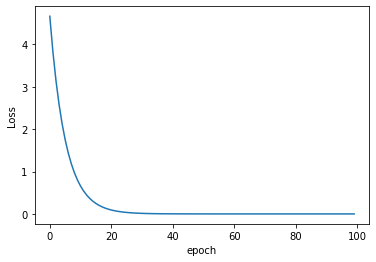

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1,2,3]
y_data = [2,4,6]

w = 1

def forward(x):
    return x * w

def cost(xs,ys):
    cost = 0
    for x_val,y_val in zip(xs,ys):
        y_pred = forward(x_val)
        cost += (y_pred-y_val)**2
    return cost/len(xs)

def gradient(xs,ys):
    grad = 0
    
    # 损失对梯度求导，化简得到如下公式
    for x,y in zip(xs,ys):
        grad += 2*x*(x*w-y)
    return grad / len(xs)

print("Predict(before training)",4,forward(4))

cost_val_list = []
epoch_list = []
for epoch in range(100):
    cost_val = cost(x_data,y_data)
    cost_val_list.append(cost_val)
    epoch_list.append(epoch)
    
    grad_val = gradient(x_data,y_data)
    w -= 0.01* grad_val 
    
    print("epoch: ",epoch,"w:",w,"loss: ",cost_val)

print("Predict(after training)",4,forward(4))

plt.plot(epoch_list,cost_val_list)
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

* 随机梯度下降法，在每个epoch内，对于每个样本更新一次梯度
* Mini-Batch 随机梯度下降，在每个epoch内，用每个Batch更新一次梯度

最基本的对象是Tensor，用来存储数据。包括data和grad。

In [16]:
import torch

x_data = [1,2,3]
y_data = [2,4,6]

w = torch.Tensor([1.0])
w.requires_grad = True 

def forward(x):
    return x * w #x自动类型转化为Tensor

# 构建计算图
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)**2

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l = loss(x,y) # Forward compute the loss
        l.backward() # l 即loss现在是一个张量Tensor,调用backward可以把梯度都求出来，
        # 求出来之后存在需要梯度的变量中（这里是w），释放计算图
        print("grad:",x,y,w.grad.item()) # item，值以标量形式取出来
        w.data = w.data - 0.01 * w.grad.data #grad也是一个Tensor，所以必须取到值，只进行数值更新
        
        w.grad.data.zero_() #梯度值清零，不清零就会累加
    print("progress:",epoch,l.item)


print("Predict(after training)",4,forward(4).item())


grad: 1 2 -2.0
grad: 2 4 -7.840000152587891
grad: 3 6 -16.228801727294922
progress: 0 <built-in method item of Tensor object at 0x0000025F0E2AB180>
grad: 1 2 -1.478623867034912
grad: 2 4 -5.796205520629883
grad: 3 6 -11.998146057128906
progress: 1 <built-in method item of Tensor object at 0x0000025F0E2AB3B0>
grad: 1 2 -1.0931644439697266
grad: 2 4 -4.285204887390137
grad: 3 6 -8.870372772216797
progress: 2 <built-in method item of Tensor object at 0x0000025F0E2AB0E0>
grad: 1 2 -0.8081896305084229
grad: 2 4 -3.1681032180786133
grad: 3 6 -6.557973861694336
progress: 3 <built-in method item of Tensor object at 0x0000025F0E276950>
grad: 1 2 -0.5975041389465332
grad: 2 4 -2.3422164916992188
grad: 3 6 -4.848389625549316
progress: 4 <built-in method item of Tensor object at 0x0000025F0E276220>
grad: 1 2 -0.4417421817779541
grad: 2 4 -1.7316293716430664
grad: 3 6 -3.58447265625
progress: 5 <built-in method item of Tensor object at 0x0000025F0E276950>
grad: 1 2 -0.3265852928161621
grad: 2 4 -1.

grad: 1 2 -7.152557373046875e-07
grad: 2 4 -2.86102294921875e-06
grad: 3 6 -5.7220458984375e-06
progress: 69 <built-in method item of Tensor object at 0x0000025F0E2ABC70>
grad: 1 2 -7.152557373046875e-07
grad: 2 4 -2.86102294921875e-06
grad: 3 6 -5.7220458984375e-06
progress: 70 <built-in method item of Tensor object at 0x0000025F0E2AB450>
grad: 1 2 -7.152557373046875e-07
grad: 2 4 -2.86102294921875e-06
grad: 3 6 -5.7220458984375e-06
progress: 71 <built-in method item of Tensor object at 0x0000025F0E2AB3B0>
grad: 1 2 -7.152557373046875e-07
grad: 2 4 -2.86102294921875e-06
grad: 3 6 -5.7220458984375e-06
progress: 72 <built-in method item of Tensor object at 0x0000025F0E276310>
grad: 1 2 -7.152557373046875e-07
grad: 2 4 -2.86102294921875e-06
grad: 3 6 -5.7220458984375e-06
progress: 73 <built-in method item of Tensor object at 0x0000025F0E276450>
grad: 1 2 -7.152557373046875e-07
grad: 2 4 -2.86102294921875e-06
grad: 3 6 -5.7220458984375e-06
progress: 74 <built-in method item of Tensor obje

## 用PyTorch实现线性回归
1. 准备数据集
2. 设计模型
3. 构造损失函数和优化器
4. 训练周期：forward backward update

In [9]:
import torch
x_data = torch.Tensor([[1],[2],[3]])  # 初始化为一个3*1的矩阵
y_data = torch.Tensor([[2],[4],[6]])

# 将模型定义成一个类，继承自torch.nn.Module，需要实现init和forward两个函数
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__() #调用父类的构造，必须要有
        self.linear = torch.nn.Linear(1,1) #Linear对象中包含了weight和bias这两个Tensor,自动实现wx+b
        
        
    def forward(self,x):
        y_pred = self.linear(x) #可以直接计算wx+b
        return y_pred

model = LinearModel()

# 构造损失函数和优化器
# 这里损失函数用MSE   torch.nn.MSELoss(size_average=True,reduce=True) reduce是否需要将所有loss加起来
criterion = torch.nn.MSELoss(size_average = False)

# optim中有一个类叫SGD torch.optim.SGD() weight_decay(加一个w^Tw的优化目标)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)#告诉优化器对哪些Tensor做梯度优化，由model中的paramenters告知

# 训练过程
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad() #梯度归零
    loss.backward() #后向传播
    optimizer.step() # 梯度Update

# 输出权重和bias
print("w=",model.linear.weight.item())
print("b=",model.linear.bias.item())

# Test Model
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ',y_test.item())

0 28.75530433654785
1 13.294954299926758
2 6.405348777770996
3 3.331295967102051
4 1.955918312072754
5 1.3368438482284546
6 1.0545504093170166
7 0.9222782850265503
8 0.8568872213363647
9 0.8213627338409424
10 0.7992258667945862
11 0.7831403017044067
12 0.7698376774787903
13 0.7578622102737427
14 0.7465647459030151
15 0.7356551885604858
16 0.7250020503997803
17 0.7145463228225708
18 0.7042620182037354
19 0.6941332817077637
20 0.6841545104980469
21 0.6743206977844238
22 0.6646289825439453
23 0.6550768613815308
24 0.645662248134613
25 0.6363823413848877
26 0.6272370219230652
27 0.618222713470459
28 0.6093379259109497
29 0.6005805134773254
30 0.5919494032859802
31 0.5834417939186096
32 0.5750572085380554
33 0.566792905330658
34 0.5586469769477844
35 0.5506184101104736
36 0.542704701423645
37 0.5349050164222717
38 0.5272178053855896
39 0.5196410417556763
40 0.5121729373931885
41 0.5048122406005859
42 0.49755722284317017
43 0.49040618538856506
44 0.4833584725856781
45 0.47641199827194214
46 

nn = nerual network

torch.nn.Linear(输入特征维度，输出特征维度，bias = True) 

In [4]:
def func(*args, **kwargs):
    print(args)
    print(kwargs)
func(1,2,3,4,x=3,y=5)


class Foobar:
    def __init__(self):
        pass
    def __call__(self,*args,**kwargs):
        print("Hello"+str(args[0]))

foobar = Foobar()
foobar(1,2,3) ##__call__函数使得类的一个实例可以像函数一样被调用

(1, 2, 3, 4)
{'x': 3, 'y': 5}
Hello1
